In [1]:
import matplotlib.pyplot as plt
import numpy as np

### A simple example
Matplotlib graphs your data on Figures (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.). The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes, and show to display the figure:

#### 1
-> class matplotlib.figure.Figure(figsize=None, dpi=None, *, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None, layout=None, **kwargs)

dpi-> Dots per inch
-> The top level container for all the plot elements.

#### 2
-> class matplotlib.axes.Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, forward_navigation_events='auto', **kwargs)

-> An Axes object encapsulates all the elements of an individual (sub-)plot in a figure.
-> It contains most of the (sub-)plot elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.
-> Like all visible elements in a figure, Axes is an Artist subclass.
-> The Axes instance supports callbacks through a callbacks attribute which is a CallbackRegistry instance. The events you can connect to are 'xlim_changed' and 'ylim_changed' and the callback will be called with func(ax) where ax is the Axes instance.

#### 3
-> matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)

-> Create a figure and a set of subplots.
-> This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.

#### 4
-> Axes.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

-> Plot y versus x as lines and/or markers.

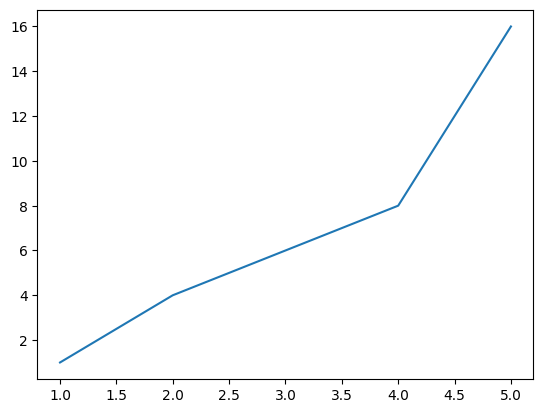

In [3]:
fig, ax = plt.subplots() # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4, 5], [1, 4, 6, 8, 16]) # Plot some data on the Axes.
plt.show() #Show the figure.

#### Figure
The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc.), and even nested subfigures.


###
In simpler terms:

The figure is like a sheet of paper.
The axes is the box where the actual graph or plot appears on that paper.
Example:
When you create a simple line plot, it appears inside an Axes object, which has:

X-axis (horizontal).
Y-axis (vertical).
The plotted data.

<Figure size 640x480 with 0 Axes>

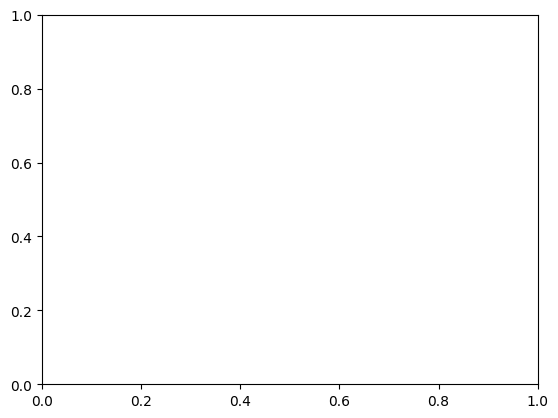

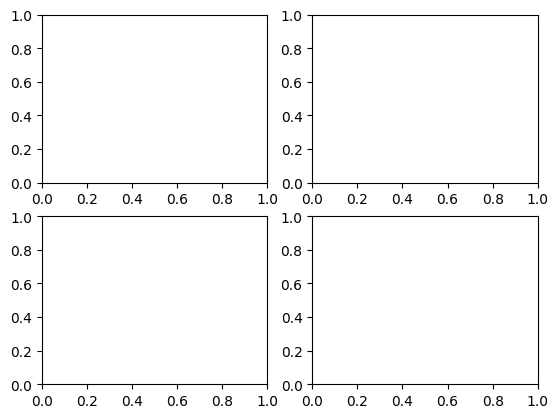

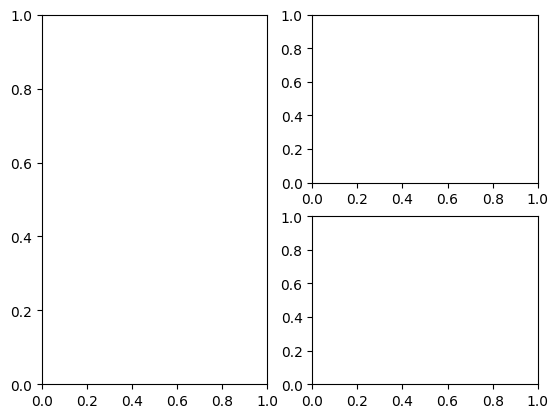

In [5]:
fig = plt.figure()  # an empty figure with no Axes  # Creates an empty figure with no axes.
fig, ax = plt.subplots()  # a figure with a single Axes  # Creates a figure with one set of axes.
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes  # Creates a figure with a 2x2 grid of axes.

# a figure with one Axes on the left, and two on the right:  # Now creates a mosaic layout for multiple axes.
fig, axs = plt.subplot_mosaic([['left', 'right_top'],  # Left column spans two rows, right column has top and bottom axes.
                               ['left', 'right_bottom']])  # Defines the layout with named regions.


### 1.
subplots() and subplot_mosaic are convenience functions that additionally create Axes objects inside the Figure, but you can also manually add Axes later on.

### 2.
Axes
----
An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes methods are the primary interface for configuring most parts of your plot (adding data, controlling axis scales and limits, adding labels etc.).

### 3.
Axis
----
These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### 4.
Artist
------
Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

### 5.
Types of inputs to plotting functions
-------------------------------------
Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix


In [7]:
b = np.matrix([[1,2], [3,4]])
b_asarray = np.asarray(b)

# Most methods will also parse a string-indexable object like a dict, a structured numpy array, or a pandas.DataFrame. 
# Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to 
# the x and y variables.


Text(0, 0.5, 'entery b')

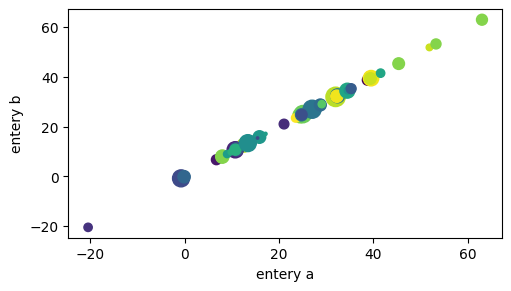

In [10]:
np.random.seed(1978909598)  # seed the random number generator to make results reproducible.
data = {'a': np.arange(50),  # create an array 'a' with values from 0 to 49.
        'c': np.random.randint(0, 50, 50),  # create an array 'c' with 50 random integers between 0 and 49.
        'd': np.random.randn(50)}  # create an array 'd' with 50 random values from a normal distribution.
data['b'] = data['a'] = data['a'] + 10 * np.random.randn(50)  # add noise to 'a' and set 'b' to the same as 'a'.
data['d'] = np.abs(data['d']) * 100  # take the absolute values of 'd' and scale them by 100 (for marker size).

fig, ax = plt.subplots(figsize=(5, 2.8), layout='constrained')  # create a figure with a constrained layout and specific size.
ax.scatter('a', 'b', c='c', s='d', data=data)  # create a scatter plot using 'a' and 'b' for x and y, 'c' for color, 'd' for marker size.
ax.set_xlabel('entery a')  # set the x-axis label to 'entery a'.
ax.set_ylabel('entery b')  # set the y-axis label to 'entery b'.



# In this context, layout refers to how the plot is organized or arranged within the figure. 
# Setting layout='constrained' makes sure that the space between the plot and the figure edges 
# is optimized so that nothing gets cut off or crowded.


# -> In the code you shared, ax.scatter('a', 'b', c='c', s='d', data=data) does the following:

# 'a': Data for the x-axis.
# 'b': Data for the y-axis.
# 'c': Data that defines the color of each point.
# 'd': Data that defines the size of each point.


### Coding styles
#### The explicit and the implicit interfaces

As noted above, there are essentially two ways to use Matplotlib:

    Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

    Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.


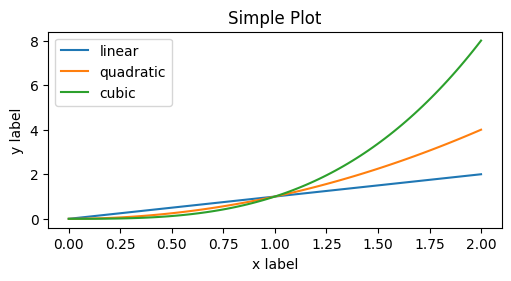

In [12]:
# use the OO-style

x = np.linspace(0, 2, 100)  # Generate 100 evenly spaced numbers between 0 and 2.

# Note that even in Object-Oriented-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')  # Create a figure and axes with constrained layout and specific size.
ax.plot(x, x, label='linear')  # Plot a linear line (y = x) with the label 'linear'.
ax.plot(x, x**2, label='quadratic')  # Plot a quadratic curve (y = x^2) with the label 'quadratic'.
ax.plot(x, x**3, label='cubic')  # Plot a cubic curve (y = x^3) with the label 'cubic'.
ax.set_xlabel('x label')  # Set the label for the x-axis as 'x label'.
ax.set_ylabel('y label')  # Set the label for the y-axis as 'y label'.
ax.set_title("Simple Plot")  # Set the title of the plot as 'Simple Plot'.
ax.legend()  # Display the legend, which shows labels for the plotted lines.


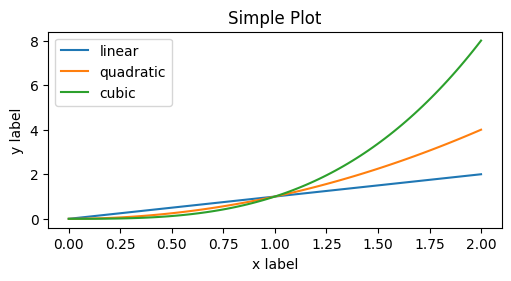

In [15]:
# or the pyplot-style:

x = np.linspace(0, 2, 100)  # Generate 100 evenly spaced numbers between 0 and 2.

plt.figure(figsize=(5, 2.7), layout='constrained')  # Create a figure with a constrained layout and specific size.

# Plot some data on the (implicit) Axes. This is the state-based interface for Matplotlib.
plt.plot(x, x, label='linear')  # Plot a linear line (y = x) and label it 'linear'.
plt.plot(x, x**2, label='quadratic')  # Plot a quadratic curve (y = x^2) and label it 'quadratic'.
plt.plot(x, x**3, label='cubic')  # Plot a cubic curve (y = x^3) and label it 'cubic'.
plt.xlabel('x label')  # Add a label to the x-axis as 'x label'.
plt.ylabel('y label')  # Add a label to the y-axis as 'y label'.
plt.title("Simple Plot")  # Set the plot title as 'Simple Plot'.
plt.legend()  # Display the legend to show the labels of the plotted lines.


### Making a helper functions
If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [17]:
def my_plotter(ax, data1, data2, param_dict):  # Define a function 'my_plotter' with arguments for Axes, two data sets, and a parameter dictionary.
    """
    A helper function to make a graph.  # Docstring describing the purpose of the function.
    """
    out = ax.plot(data1, data2, **param_dict)  # Use the 'plot' method of the Axes object to plot 'data1' vs 'data2', applying the keyword arguments from 'param_dict'.
    return out  # Return the output of the plot (usually a list of Line2D objects).


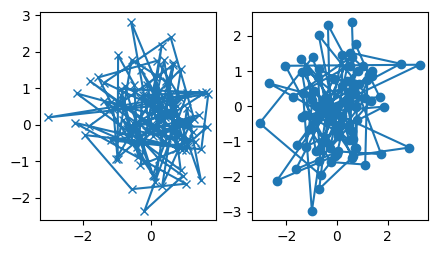

In [18]:
# which you would then use twice to populate two subplots:

data1, data2, data3, data4 = np.random.randn(4, 100)  # Generate 4 sets of random data, each containing 100 values.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))  # Create a figure with two subplots (1 row, 2 columns) and set the figure size.

my_plotter(ax1, data1, data2, {'marker': 'x'})  # Use 'my_plotter' function to plot 'data1' vs 'data2' on ax1 with 'x' markers.
my_plotter(ax2, data3, data4, {'marker': 'o'})  # Use 'my_plotter' function to plot 'data3' vs 'data4' on ax2 with 'o' markers.


--> In Matplotlib, markers are used to highlight the data points on a plot. They make the individual points stand out and can help in distinguishing different data sets or categories in a scatter plot or line plot.

### 'x' marker:
-> This marker style displays data points as crosses.
-> Example: ax.plot(x, y, marker='x') will plot the data points with cross symbols.

### 'o' marker:
-> This marker style displays data points as circles.
-> Example: ax.plot(x, y, marker='o') will plot the data points with circular symbols.

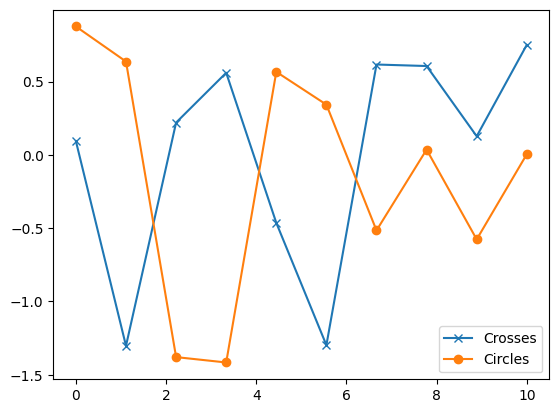

In [20]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module for plotting.
import numpy as np  # Import the numpy module for numerical operations.

# Generate random data
x = np.linspace(0, 10, 10)  # Create an array 'x' with 10 evenly spaced values from 0 to 10.
y1 = np.random.randn(10)  # Generate 10 random numbers from a normal distribution for 'y1'.
y2 = np.random.randn(10)  # Generate 10 random numbers from a normal distribution for 'y2'.

plt.plot(x, y1, marker='x', label='Crosses')  # Plot 'x' vs 'y1' with 'x' markers and label it 'Crosses'.
plt.plot(x, y2, marker='o', label='Circles')  # Plot 'x' vs 'y2' with 'o' markers and label it 'Circles'.
plt.legend()  # Display the legend to show the labels for the different markers.
plt.show()  # Show the plot with the specified markers and labels.
